In [55]:
# You may start here

''' 
This is a program which uses sentiment analysis on a dataset containing a range of 
steam reviews. Steam is a game launcher which also doubles as a store front, as a result, 
we get the benefit of reviews. the program will first analyze
the reviews and determine whether or not a review is positive, or negative. then the program
will add these sentiment values to a new sentiment column. and in the end, we will get the mean
of every value within the sentiment column and spit out the mean of every value and provide
an 'overall' result.

it should look something like this:
" Positivity: 50.4%
  Negativity: 49.6%
  
  Overall: Positive
"

'''

# we will start by setting up the dataframe

#For the sentiment analyzer, We have decided to use the flair library. I have personally chosen
#this library due it's automated classification for sentiment.
from flair.models import TextClassifier
from flair.data import Sentence
import pandas as pd

#importing the dataset
dataframe = pd.read_csv('dataset.csv')

#taking the product we would to like analyze
dataframe = dataframe[dataframe['app_name'] == 'Terraria']
dataframe = dataframe.reset_index()

dataframe.head()

#review score: explicit value provided by the user to indicate whether the user recommends a game (1) or doesn't (-1)
#review vote:  value which indicates if 1 or more people agree with the review (1) or don't (0)

,index,app_id,app_name,review_text,review_score,review_votes
0,68092,105600,Terraria,You can be a werewolf riding a unicorn while s...,1,0
1,68093,105600,Terraria,You should by 8 copies of this game and go aro...,1,0
2,68094,105600,Terraria,Introduction,1,1
3,68095,105600,Terraria,"If you have friends, this is a great game to p...",1,1
4,68096,105600,Terraria,A Generic Comparison of Terraria versus Minecr...,1,0


In [56]:
#Data description
print("product name: " + dataframe['app_name'][0])
print("columns: " + str(len(dataframe.columns.view())))
print("reviews: " + str(len(dataframe.index)))
dataframe.describe()

product name: Terraria
columns: 6
reviews: 84828


,index,app_id
count,84828.000000,84828.0
mean,110505.500000,105600.0
std,24487.878655,0.0
min,68092.000000,105600.0
25%,89298.750000,105600.0
50%,110505.500000,105600.0
75%,131712.250000,105600.0
max,152919.000000,105600.0


In [57]:
#loading the Sentiment analyzer from the flair module and loading the 'sentiment' model
tag = TextClassifier.load('sentiment')
#Sentence function to hold text metadata. helps with sentiment analysis
sentence = Sentence('a fine experience')
tag.predict(sentence)
print(sentence)


Sentence[1]: "fine" → POSITIVE (0.848)


In [58]:
#alternative solution. ignore
#dataframe['sentiment'] = dataframe['review_text'].apply(lambda x: tag.predict(Sentence(str(x))))
def sentimentPredict(text):
    sentence = Sentence(str(text))
    tag.predict(sentence)
    if sentence.labels:
        sentiment = sentence.labels[0].value  # get the value of the first label
        return sentiment.lower()  # convert to lowercase
    else:
        return 'unknown'  # or handle this case differently

dataframe['sentiment'] = dataframe['review_text'].apply(sentimentPredict)


In [59]:
#determine the overall consensus towards the game
def overall(pos, neg):
    if pos > neg:
        return 'positive'
    elif neg > pos:
        return 'negative'
    else:
        return 'unknown'

In [60]:
dataframe['review_score'] = pd.to_numeric(dataframe['review_score'], errors='coerce')

pos = str((len(dataframe[dataframe['sentiment'] == 'positive'])/84828)*100)
neg = str((len(dataframe[dataframe['sentiment'] == 'negative'])/84828)*100)

print('positive ratings (pre-clean): ' + pos) #divided by the number of total reviews
print('negative ratings (pre-clean): ' + neg)


positive ratings (pre-clean): 80.38501438204366
negative ratings (pre-clean): 19.611449049842033


In [70]:
falsepositives = dataframe[(dataframe['review_score'] < 0) & (dataframe['sentiment'] == 'positive')]
falsenegatives = dataframe[(dataframe['review_score'] > 0) & (dataframe['sentiment'] == 'negative')]

#temporary dataframe created for measurements
tempdata = dataframe
tempdata = tempdata.drop(falsepositives.index)
tempdata = tempdata.drop(falsenegatives.index)

falsepositives = falsepositives.reset_index(drop=True)
falsenegatives = falsenegatives.reset_index(drop=True)

#falsenegatives.head()
#falsepositives.head()

In [71]:
pos = str((len(tempdata[tempdata['sentiment'] == 'positive'])/84828)*100)
neg = str((len(tempdata[tempdata['sentiment'] == 'negative'])/84828)*100)

#a large amount of negative reviews were dropped. will explain at the end
print('positive ratings: ' + pos)
print('negative ratings: ' + neg)

print('overall: ' + overall(pos, neg))


positive ratings: 80.02899985853728
negative ratings: 2.6818974866789267
overall: positive


unfiltered


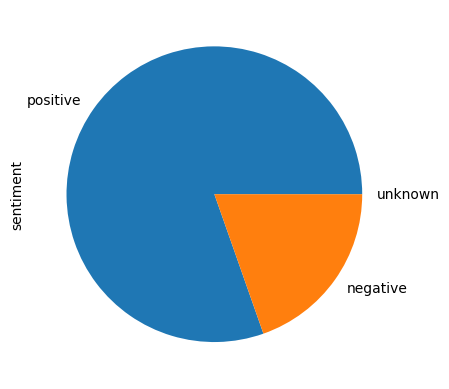

filtered


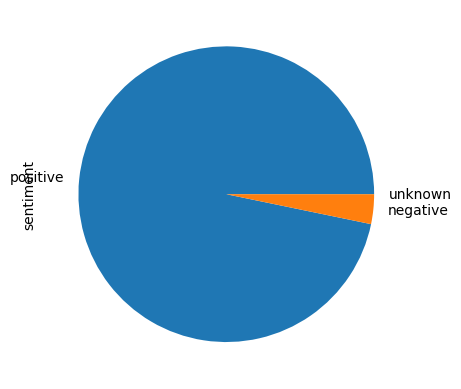

In [72]:
import matplotlib.pyplot as plt

print('unfiltered')
dataframe['sentiment'].value_counts().plot(kind="pie")
plt.show()

print('filtered')
tempdata['sentiment'].value_counts().plot(kind="pie")
plt.show()

In [92]:
example = falsepositives["review_text"][10]
sentence = Sentence(example)
tag.predict(sentence)
print(example)
print('prediction: ' + sentence.labels[0].value)

print('''\nthis is a result of the sentiment analyzer not being able to handle the heart unicode (♥).
steam censors profanity using this unicode and since the sentiment analyzer can't process it, 
it ends up working with what it can.''')


There is only one way to describe this game: ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ ♥♥♥♥♥♥♥♥♥ ♥♥♥ ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ ♥ ♥♥ ♥♥♥♥♥ ♥♥♥♥♥♥♥ ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥
prediction: POSITIVE

this is a result of the sentiment analyzer not being able to handle the heart unicode (♥).
steam censors profanity using this unicode and since the sentiment analyzer can't process it, 
it ends up working with what it can.


In [93]:
dataframe.to_csv('data.csv')